### Task 2 - Prediction of store sales

Prediction of sales is the central task in this challenge. We will predict daily sales in various stores up to 6 weeks ahead of time. 

In [1]:
import pandas as pd

# Load the data
file_path = 'train_merged_df.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.info(), data.describe()


C:\Users\Windows\AppData\Local\Temp\ipykernel_12244\2045182858.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  float64
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1017209 non-null  float64
 13  CompetitionO

(   Unnamed: 0  Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
 0           0      1          5  2015-07-31   5263.0        555     1      1   
 1           1      2          5  2015-07-31   6064.0        625     1      1   
 2           2      3          5  2015-07-31   8314.0        821     1      1   
 3           3      4          5  2015-07-31  13995.0       1485     1      1   
 4           4      5          5  2015-07-31   4822.0        559     1      1   
 
   StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0            0              1         c          a               1270.0   
 1            0              1         a          a                570.0   
 2            0              1         a          a              14130.0   
 3            0              1         c          c                620.0   
 4            0              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYea

In [2]:
data

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0.0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1017205,1112,2,2013-01-01,0.0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1017206,1113,2,2013-01-01,0.0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1017207,1114,2,2013-01-01,0.0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


2.1 Preprocessing

We will do the feature engineering as per below:-

- Drop Unnecessary Columns: Unnamed: 0 seems unnecessary as it just mirrors the index.
- Date Handling: Convert Date from string to datetime format. We can then extract features like year, month, and day, which might be useful for the model.
- Categorical Variables: Encode categorical variables such as StoreType, Assortment, and potentially PromoInterval if we find it useful.
- PromoInterval Processing: The PromoInterval column needs special attention to convert it into a format that's useful for machine learning model.

In [3]:
# Let's proceed with the initial feature engineering steps as outlined:

from sklearn.preprocessing import LabelEncoder

# Step 1: Drop 'Unnamed: 0' column
data.drop('Unnamed: 0', axis=1, inplace=True)

# Step 2: Convert 'Date' column to datetime and extract year, month, and day
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Step 3: Encode categorical variables
label_encoder_store_type = LabelEncoder()
data['StoreTypeEncoded'] = label_encoder_store_type.fit_transform(data['StoreType'])

label_encoder_assortment = LabelEncoder()
data['AssortmentEncoded'] = label_encoder_assortment.fit_transform(data['Assortment'])

# Step 4: Transform 'PromoInterval' into usable format (binary features for each month)
# First, let's see what unique values 'PromoInterval' has
unique_promo_intervals = data['PromoInterval'].unique()
unique_promo_intervals


C:\Users\Windows\AppData\Local\Temp\ipykernel_12244\3115124175.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

The PromoInterval column has four unique values: '0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', and 'Mar,Jun,Sept,Dec'. This suggests a straightforward approach to feature engineering: we can create binary features for each of the twelve months to indicate whether a promo is active during that month, based on the PromoInterval string.

In [4]:
# Initialize columns for each month to 0
for month in range(1, 13):
    data[f'Promo_{month}'] = 0

# Function to update the month columns based on PromoInterval
def update_promo_months(row):
    if row['PromoInterval'] != '0':
        months_map = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }
        intervals = row['PromoInterval'].split(',')
        for month in intervals:
            month_num = months_map[month]
            row[f'Promo_{month_num}'] = 1
    return row

# Apply the function to update the month columns based on PromoInterval
data = data.apply(update_promo_months, axis=1)

# Display a sample of the data to verify the transformation
data[['PromoInterval', 'Promo_1', 'Promo_2', 'Promo_3', 'Promo_4', 'Promo_5', 'Promo_6', 'Promo_7', 'Promo_8', 'Promo_9', 'Promo_10', 'Promo_11', 'Promo_12']].head()


,PromoInterval,Promo_1,Promo_2,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Jan,Apr,Jul,Oct",1,0,0,1,0,0,1,0,0,1,0,0
2,"Jan,Apr,Jul,Oct",1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


The transformation of the PromoInterval column into binary features for each month has been successfully completed. For each record, there are now twelve binary features (Promo_1 to Promo_12), indicating the active promo months based on the PromoInterval information.

With these steps, the data now includes:

Year, month, and day extracted from the original Date column.
Encoded categorical variables for StoreType and Assortment.
Twelve binary features representing the active promo months.

In [5]:
# Scale the data

from sklearn.preprocessing import StandardScaler

# Identifying numerical columns to scale (excluding binary and categorical encoded columns)
numerical_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance',
                     'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
                     'Year', 'Month', 'Day']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the numerical columns and transforming the data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display a sample of the scaled data
data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
0,-1.731640,0.501484,2015-07-31,-0.118975,-0.144501,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
1,-1.728534,0.501484,2015-07-31,0.103784,0.035624,1,1,0,1,a,...,0,1,0,0,1,0,0,1,0,0
2,-1.725427,0.501484,2015-07-31,0.729513,0.539972,1,1,0,1,a,...,0,1,0,0,1,0,0,1,0,0
3,-1.722321,0.501484,2015-07-31,2.309409,2.248582,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
4,-1.719214,0.501484,2015-07-31,-0.241618,-0.134208,1,1,0,1,a,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Save the data for further use

data.to_csv('Data_for_DL_Model.csv')

In [7]:
# Reduce the size of the DataFrame to 50% of its original size for further use
reduced_df = data.sample(frac=0.5)

reduced_df.to_csv('reduced_df.csv')

reduced_df
# Now this is the reduced dataframe, We will use it for web app creation

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
520003,-1.473803,1.002138,2014-03-22,1.165299,1.422582,1,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
383567,-0.287130,1.502791,2014-07-27,-1.582625,-1.572631,0,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
61275,1.576753,1.502791,2015-06-07,-1.582625,-1.572631,0,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
265011,0.433571,-1.501129,2014-12-01,2.324566,2.248582,1,1,0,0,a,...,0,0,0,0,0,0,0,0,0,0
147584,-0.476625,1.002138,2015-03-21,-0.630961,-0.594812,1,0,0,0,a,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551910,0.660344,1.002138,2014-02-22,-0.081710,-0.172806,1,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
77385,-0.333728,1.002138,2015-05-23,-0.208524,-0.461005,1,0,0,0,a,...,0,1,0,0,1,0,0,1,0,0
619490,-0.690972,-1.501129,2013-12-23,2.324566,2.248582,1,0,0,1,a,...,0,0,0,0,0,0,0,0,0,0
359412,0.306206,0.501484,2014-08-22,0.085708,0.328969,1,1,0,0,c,...,0,1,0,0,1,0,0,1,0,0


2.2 Building models with sklearn pipelines

The steps for building the model with a pipeline :

1) Define the features (X) and the target (y). For simplicity, we'll use all scaled and encoded features for X and Sales for y.
2) Split the dataset into training and testing sets to evaluate the model's performance.
3) Create a pipeline that includes any necessary preprocessing steps and the Random Forest Regressor.
4) Train the model using the training data.
5) Evaluate the model's performance on the test set.

In [8]:
# Let's start by defining our features and target, and then splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

# Defining features and target
X = data.drop(['Sales', 'Date', 'StoreType', 'Assortment', 'PromoInterval', 'StateHoliday'], axis=1)
y = data['Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((813767, 29), (203442, 29), (813767,), (203442,))

The dataset has been split into training and testing sets, with 813767 samples for training and 203442 samples for testing.

In [9]:
# Now, let's create a pipeline that includes the Random Forest Regressor. 
# We'll train the model using the training data and then evaluate its performance on the test set. 

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Creating the pipeline with a Random Forest Regressor
pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)


#2.3 Choosing a loss function (Mean Squared Error (MSE))
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.012498878921611702, 0.9874841997522832)

The Random Forest Regressor model, trained and evaluated through our scikit-learn pipeline, yielded a mean squared error (MSE) of approximately 0.0125 and an R-squared (R²) value of about 0.987 on the test set.

The R² value indicates that our model explains approximately 98.7% of the variance in the sales data, which is a strong performance for this type of regression problem. The MSE is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

A lower MSE indicates a closer fit of the model to the data. In this context, an MSE of approximately 0.0125 suggests that, on average, the squared difference between the predicted and actual sales values is quite low, indicating high model accuracy.

An R² of approximately 0.987 suggests that the model explains around 98.7% of the variability in the sales data, which is exceptionally high. It indicates that the model is highly effective at predicting sales.

Overall Interpretation :-

Our model shows excellent performance with a very high R² value and a low MSE, suggesting that it accurately predicts sales and that most of the variance in the sales data is captured by our model.

2.4 Post Prediction analysis

Feature Importance Analysis

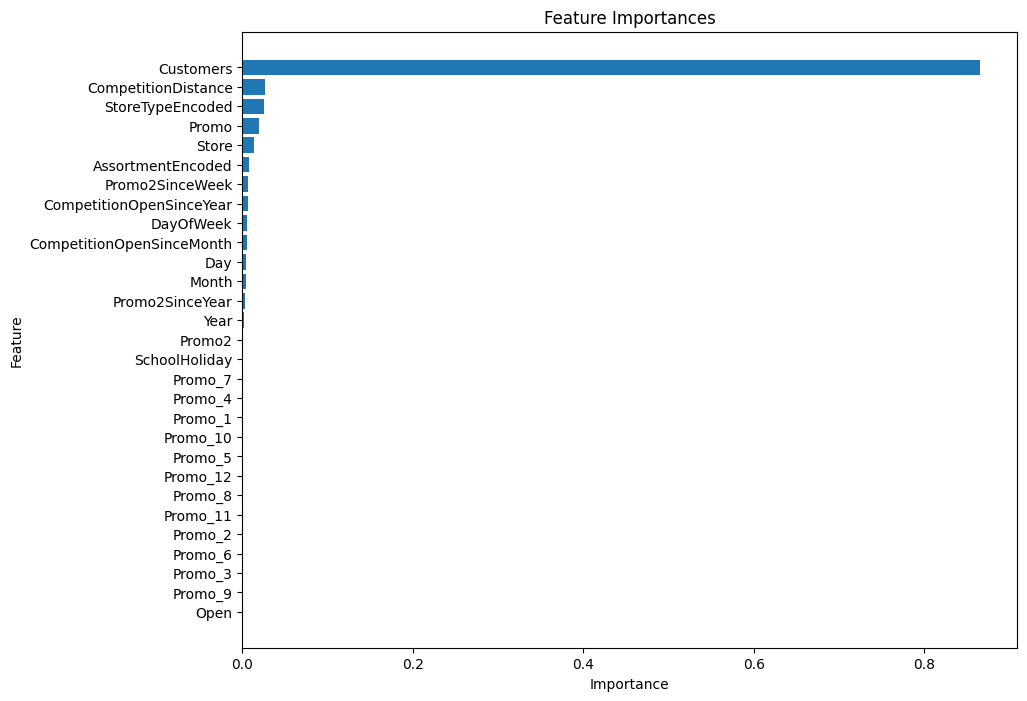

c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without f

array([6.54555557e-13, 1.31215080e-01, 1.52945975e-01, 6.78775363e-02,
       3.87562737e-01])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting feature importances
feature_importances = pipeline.named_steps['rf'].feature_importances_

# Matching feature names with their importances
features = X_train.columns
importance_dict = dict(zip(features, feature_importances))

# Sorting features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.yticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

# Calculate standard deviation of predictions from individual trees for the first few test examples
random_forest_model = pipeline.named_steps['rf']
individual_tree_predictions = np.array([tree.predict(X_test) for tree in random_forest_model.estimators_])

# Calculate the standard deviation for each prediction
prediction_std = np.std(individual_tree_predictions, axis=0)

# Display standard deviations as a proxy for prediction uncertainty
prediction_std[:5]


The feature importance analysis revealed which features the Random Forest model finds most informative for predicting sales. We can expect features like Customers, Promo, and perhaps some of the date-related features (like day of the week or month) to be among the top contributors, reflecting their impact on sales volume.

2.5 Serialize models

In [13]:
import joblib
from datetime import datetime


model = pipeline  

# Get the current time and format it as MM-DD-YYYY-HH-MM-SS-00
timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S-00")

# Construct the filename with the timestamp
filename = f"model_{timestamp}.pkl"

# Save the model
with open(filename, 'wb') as file:
    joblib.dump(model, file)

print(f"Model saved as {filename}")


Model saved as model_04-10-2024-13-34-55-00.pkl


2.6 Building model with deep learning 

We will use Deep Learning techniques to predict various outcomes including but not limited to future sales. Our task is to create a deep learning model of the Long Short Term Memory which is a type of Recurrent Neural Network.
Following tasks we will be doing for this -
1.	Isolate the Rossmann Store Sales dataset into time series data.
2.	Check whether your time Series Data is Stationary
3.	Depending on your conclusion from 2 above difference your time series data
4.	Check for autocorrelation and partial autocorrelation of your data
5.	Transform the time series data into supervised learning data by creating a new y(target) column. 
6.	Scale your data in the (-1, 1) range.
7.	Build a LSTM Regression model to predict the next sale. 


In [25]:

# Load the dataset
file_path = 'train_merged_df.csv'
data1 = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data1.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_12244\3236826037.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path)


,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
# Isolate the dataset into time series data and Check whether your time Series Data is Stationary

from statsmodels.tsa.stattools import adfuller

# Convert 'Date' to datetime and set as index
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data1.set_index('Date', inplace=True)

# We will use the 'Sales' column for the time series
# Aggregating sales data by date to create a single time series
daily_sales = data1['Sales'].resample('D').sum()

# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(daily_sales.dropna())

# Display the ADF statistic and p-value
adf_statistic, p_value = adf_result[0], adf_result[1]
adf_statistic, p_value


C:\Users\Windows\AppData\Local\Temp\ipykernel_12244\126281041.py:6: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)


(-4.680473879416931, 9.155499532184966e-05)

The p-value is very small (much less than 0.05), and the ADF statistic is significantly negative, we can reject the null hypothesis of the ADF test. This leads us to conclude that the time series is stationary, meaning it does not have any unit root, and its statistical properties do not change over time. This is often a desirable property in time series analysis

In [27]:
# Depending on conclusion from 2 above, difference your time series data

# Difference the time series to make it stationary
daily_sales_diff = daily_sales.diff().dropna()

# Check the differenced time series
daily_sales_diff.head()


Date
2013-01-02    6795038.0
2013-01-03    -577957.0
2013-01-04     293206.5
2013-01-05    -695857.0
2013-01-06   -5775363.0
Freq: D, Name: Sales, dtype: float64

The time series data has been differenced, resulting in changes in sales from one day to the next.

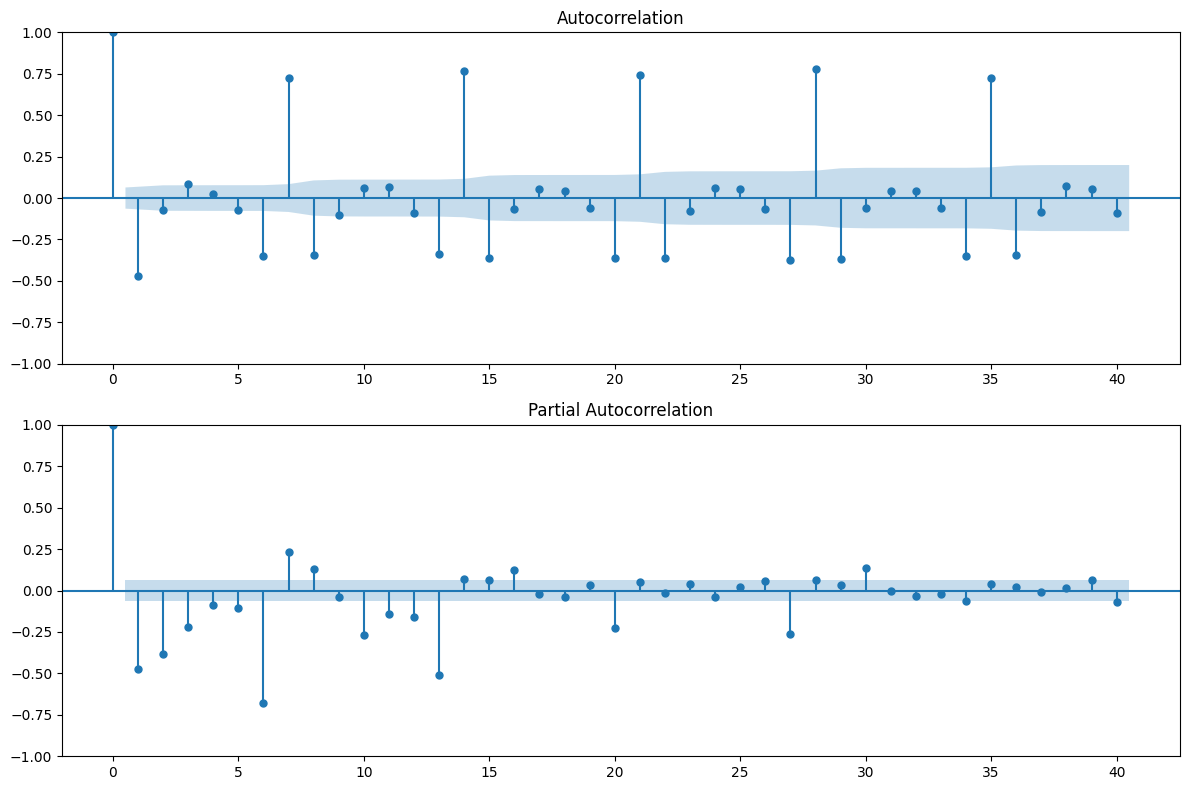

In [28]:
# Check for autocorrelation and partial autocorrelation of your data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set a suitable number of lags based on the size of the dataset
lags = min(40, len(daily_sales_diff) // 2 - 1)

# Plot autocorrelation and partial autocorrelation with the appropriate number of lags
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(daily_sales_diff, ax=ax1, lags=lags)
plot_pacf(daily_sales_diff, ax=ax2, lags=lags)

plt.tight_layout()
plt.show()


The autocorrelation (ACF) and partial autocorrelation (PACF) plots provide insights into the time series data. From these plots, we can observe how past values of the series are correlated with future values, which is important for determining the input structure of our LSTM model.

In [29]:
# Transform the time series data into supervised learning data by creating a new y(target) column.

def series_to_supervised(data1, n_in=1, n_out=1):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or 1D numpy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    df = pd.DataFrame(data1)
    cols = []
    names = []

    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (1, i))]

    # Current time (t)
    cols.append(df)
    names += [('var%d(t)' % 1)]

    # Forecast sequence (t+1, ... t+n)
    for i in range(1, n_out+1):
        cols.append(df.shift(-i))
        names += [('var%d(t+%d)' % (1, i))]

    # Concatenate all columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Drop rows with NaN values
    agg.dropna(inplace=True)
    return agg

# Apply the transformation to our dataset
n_lag = 1
supervised_data = series_to_supervised(daily_sales_diff, n_in=n_lag)

supervised_data.head()


,var1(t-1),var1(t),var1(t+1)
Date,,,
2013-01-03,6795038.0,-577957.0,293206.5
2013-01-04,-577957.0,293206.5,-695857.0
2013-01-05,293206.5,-695857.0,-5775363.0
2013-01-06,-695857.0,-5775363.0,10323443.0
2013-01-07,-5775363.0,10323443.0,-1823356.5


The data is now structured for supervised learning, where var1(t-1) represents the sales difference at the previous day, var1(t) is the current day's sales difference (our target variable), and var1(t+1) is the next day's sales difference.

In [30]:
# Scale your data in the (-1, 1) range
# We'll use MinMaxScaler from Scikit-learn to scale the data between -1 and 1

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(supervised_data)

# Convert the scaled data back to a dataframe for readability
scaled_data_df = pd.DataFrame(scaled_data, columns=supervised_data.columns, index=supervised_data.index)

scaled_data_df.head()


,var1(t-1),var1(t),var1(t+1)
Date,,,
2013-01-03,0.459749,-0.151162,-0.078980
2013-01-04,-0.151162,-0.078980,-0.160931
2013-01-05,-0.078980,-0.160931,-0.581809
2013-01-06,-0.160931,-0.581809,0.752105
2013-01-07,-0.581809,0.752105,-0.254354


The data has been scaled to the range (-1, 1), and we now have a dataframe scaled_data_df ready for deep learning modeling.

In [31]:
# Build a LSTM Regression model to predict the next sale

import tensorflow as tf
from sklearn.model_selection import train_test_split

# Selecting the relevant features for the LSTM model
X = scaled_data_df['var1(t-1)'].values.reshape(-1, 1, 1)  # Reshaping for LSTM [samples, time steps, features]
y = scaled_data_df['var1(t)'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((751, 1, 1), (188, 1, 1), (751,), (188,))

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100


c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 - 2s - 81ms/step - loss: 0.1455 - val_loss: 0.1174
Epoch 2/100
24/24 - 0s - 5ms/step - loss: 0.1306 - val_loss: 0.1070
Epoch 3/100
24/24 - 0s - 4ms/step - loss: 0.1224 - val_loss: 0.0993
Epoch 4/100
24/24 - 0s - 4ms/step - loss: 0.1140 - val_loss: 0.0932
Epoch 5/100
24/24 - 0s - 4ms/step - loss: 0.1094 - val_loss: 0.0887
Epoch 6/100
24/24 - 0s - 4ms/step - loss: 0.1047 - val_loss: 0.0856
Epoch 7/100
24/24 - 0s - 4ms/step - loss: 0.1037 - val_loss: 0.0834
Epoch 8/100
24/24 - 0s - 4ms/step - loss: 0.1001 - val_loss: 0.0820
Epoch 9/100
24/24 - 0s - 4ms/step - loss: 0.0987 - val_loss: 0.0808
Epoch 10/100
24/24 - 0s - 5ms/step - loss: 0.0955 - val_loss: 0.0797
Epoch 11/100
24/24 - 0s - 4ms/step - loss: 0.0952 - val_loss: 0.0786
Epoch 12/100
24/24 - 0s - 4ms/step - loss: 0.0953 - val_loss: 0.0776
Epoch 13/100
24/24 - 0s - 4ms/step - loss: 0.0938 - val_loss: 0.0766
Epoch 14/100
24/24 - 0s - 4ms/step - loss: 0.0927 - val_loss: 0.0756
Epoch 15/100
24/24 - 0s - 4ms/step - loss: 0.0916 - va

In [33]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Predict on the test data
y_pred = model.predict(X_test)

# Compare y_pred with y_test to see how well the model is performing
# By calculating the mean squared error, mean absolute error

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Test MSE: 0.0589283450960567
Test MAE: 0.17763976117906105


Both MSE and MAE provide a snapshot of the model's error magnitude, with MSE giving more weight to larger errors. Considering the scale of our data, the values indicate that the model is performing fairly well